In [98]:
from scipy import *
from numpy import *
import pandas as pd
import numpy as np
import geopandas as gpd
from pathlib import Path
import numpy
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from functions import *
import seaborn as sns

import make_dataset as m_d
### Per usare multi cartelle
#import sys
#sys.path.append('./../src')
#print(sys.path)

#data_path = Path('./data/raw')   #Per Cookiecutter
data_path = Path('./data/raw')
# subdivide the time series
def date_divider(df):
    """
    This Fuction extracts the data from an undivided data format YYYY-MM-DDThh-mm-ss
    Where T stands for Time and has no further meaning
    """
    column_names = ["month", "day", "hours", "temperature", "rain"]
    out = pd.DataFrame(columns=column_names)
    N = len(df["created"])  # Numero tweets creati in un giorno
    for i in range(0, N):
        # Inizializzo ogni riga o crasha
        out.loc[i] = "NaN"
        # Tempo
        # Tw_final.loc[i]["year"]=int(tweets.loc[i]["created"][0:4])  #Chemmifrega dell'anno, tutti uguali
        out.loc[i]["month"] = int(df.loc[i]["created"][5:7])
        out.loc[i]["day"] = int(df.loc[i]["created"][8:10])
        out.loc[i]["hours"] = int(df.loc[i]["created"][11:13]) + 0.5 * (
            int(df.loc[i]["created"][14:16]) >= 30)
    return out
"""
#Temperatura, per ricavare questa usiamo la stazione più vicina al tweet (sfortunamente il Trentino non ne ha tante)
dmin=10000000000
for st in weather.groupby(station):
    d=tweets["geometry"].distance(st[geometry])
gdf['distance'] = gdf['centroid'].distance(queens_point)
Tw_final.loc[i]["temperature"]=int(tweets.loc[i]["created"][5:7])
"""


"""
    NB:
    Support class to divide the hours dataset
    """
def Access_counter(df):
    """
    Please note that the data must be preprocessed by "date_divider" in order to work
    This function DOES NOT work with raw data
    This function assign a label to the minutes of the raw data in order to match them to the time resolution of the temperature aquisition.
    The result of this programme is a dictionair containing all the days!!
    """
    # I create a Support dictionary in order to get all the accesses subdivided by day
    dict = {}
    # Lunghezza is the number of elements
    lunghezza = 0
    k = 0
    mesi = df["month"].unique()
    for mese in mesi:
        temp = df[df["month"] == mese]
        lunghezza = len(temp['day'].unique())
        for j in range(lunghezza):
            data = temp[temp["day"] == j]
            bins = numpy.linspace(0, 24, 49)
            dict[k], edges = numpy.histogram(data['hours'], bins)
            k = k+1
    return dict



In [90]:
bins = numpy.linspace(0, 24, 49)
print(bins)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24. ]


In [2]:
#Questo fallisce ad importare, come mostrato a lezione 24
import json
tweets_json = json.load( open(m_d.data_path / m_d.files['twitter'][0]) )

tweets = gpd.GeoDataFrame(tweets_json['features'])

#Creiamo il punto smontando la casella point
from shapely.geometry import Point
tweets['geometry'] = tweets['geomPoint.geom'].apply(lambda x:Point(x['coordinates'][0], x['coordinates'][1]))
tweets.drop(columns=['geomPoint.geom'],inplace=True)

#Droppo roba inutile
tweets.drop(columns=['municipality.acheneID'],inplace=True)
tweets.drop(columns=['entities'],inplace=True)


print(tweets.shape)
#tweets.dtypes
tweets.head(10)


(27941, 6)


,created,timestamp,user,municipality.name,language,geometry
0,2013-11-01T00:04:16,1383260656,5fd4f31f75,Trento,it,POINT (11.13000 46.07000)
1,2013-11-01T00:01:14,1383260474,68c0e98182,Pinzolo,tl,POINT (10.83000 46.23000)
2,2013-11-01T00:43:03,1383262983,abe21fc052,Cavalese,en,POINT (11.46000 46.29000)
3,2013-11-01T00:38:37,1383262717,94d1efbbfd,Rovereto,it,POINT (11.04000 45.89000)
4,2013-11-01T00:45:40,1383263140,d261d03075,San Michele all'Adige,ru,POINT (11.12000 46.20000)
5,2013-11-01T00:45:17,1383263117,46c436c9f1,Trento,es,POINT (11.13000 46.06000)
6,2013-11-05T00:52:09,1383609129,cd79302fa7,Rovereto,und,POINT (11.03000 45.89000)
7,2013-11-01T01:25:10,1383265510,5fd4f31f75,Trento,it,POINT (11.13000 46.07000)
8,2013-11-01T01:38:40,1383266320,5fd4f31f75,Trento,pt,POINT (11.13000 46.07000)
9,2013-11-01T01:28:37,1383265717,4294c6de56,Pinzolo,en,POINT (10.82000 46.23000)


In [3]:
tweets = date_divider(tweets)

In [7]:
tweets


,month,day,hours,temperature,rain
0,11,1,0.0,NaN,NaN
1,11,1,0.0,NaN,NaN
2,11,1,0.5,NaN,NaN
3,11,1,0.5,NaN,NaN
4,11,1,0.5,NaN,NaN
...,...,...,...,...,...
27936,12,31,0.0,NaN,NaN
27937,12,29,13.0,NaN,NaN
27938,11,19,0.5,NaN,NaN
27939,11,23,9.5,NaN,NaN


In [14]:
a = 3
type(a)

int

In [19]:
type(tweets['hours'])

numpy.ndarray

In [100]:
dictionary = Access_counter(tweets)
print(dictionary[16])

[ 6  7  0  1  0  1  1  0  0  0  0  1  0  2  1  1  1  3  7  6  4  3  3  9
 12  2  7  8  6 12  5 13 11  7  7  6  5  7 11 13  2  7  7  4 10  4  6  1]


In [122]:
print(edges)
len(edges)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24. ]


49

[668. 681. 367. 370. 249. 168.  87.  34.  72. 101.  65.  53.  92. 424.
 571. 370. 387. 448. 511. 615. 588. 603. 590. 557. 559. 650. 644. 695.
 654. 714. 769. 552. 663. 664. 703. 856. 849. 873. 783. 724. 776. 884.
 984. 946. 844. 847. 669. 585.]
[668. 681. 367. 370. 249. 168.  87.  34.  72. 101.  65.  53.  92. 424.
 571. 370. 387. 448. 511. 615. 588. 603. 590. 557. 559. 650. 644. 695.
 654. 714. 769. 552. 663. 664. 703. 856. 849. 873. 783. 724. 776. 884.
 984. 946. 844. 847. 669. 585.]
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24. ]


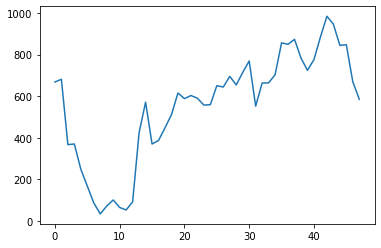

In [131]:
a = np.zeros(48)
for i in range(len(dictionary)):
    a = a + dictionary[i]
print(a)
print(a)
print(edges)
plt.plot(a, )